<a href="https://colab.research.google.com/github/zahid-bracu/buet-business-analytics/blob/main/Lecture_6_Data_Descriptive_Statistics_GroupBy_Correlation_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link : https://docs.google.com/document/d/1Wwwy3JYGwIriHEo6AzRJ6zxjPSiYjcLEUO-VqvuZK2c/edit?usp=sharing

#Descriptive Statistics
Python Descriptive Statistics process describes the basic features of data in a study suchas1. Mean
2. Standard Deviation
3. Mode
4. Skewness
5. Median

#Load Data set & Data Preprocessing

In [1]:
from google.colab import drive #importing google drive library from google colab
drive.mount('/content/drive') #mounting the google drive
import pandas as pd #importing panda library
file_path = "/content/drive/My Drive/Datas/e-commerce-data.xlsx" #Create file path
#Loading particular sheet of xlsx data into pandas data frame from the xlsx file located in google drive
fact_table = pd.read_excel(file_path, sheet_name='Fact_table', engine='openpyxl')
#Loading particular sheet of xlsx data into pandas data frame from the xlsx file located in google drive
item_dim = pd.read_excel(file_path, sheet_name='Item_dim', engine='openpyxl')
customer_dim = pd.read_excel(file_path, sheet_name='Coustomer_dim', engine='openpyxl')
time_dim= pd.read_excel(file_path, sheet_name='Time_dim', engine='openpyxl')
store_dim= pd.read_excel(file_path, sheet_name='Store_dim', engine='openpyxl')
trans_dim= pd.read_excel(file_path, sheet_name='Trans_dim', engine='openpyxl')
#Check number of null data in each column
fact_table.isnull().sum()

Mounted at /content/drive


payment_key       0
coustomer_key     0
time_key          0
item_key          0
store_key         0
quantity          3
unit             47
unit_price        1
total_price       5
dtype: int64

In [2]:
# Mode imputation
mode_value = fact_table['unit'].mode()[0]  # Calculate the mode
fact_table['unit'].fillna(mode_value, inplace=True)  # Fill missing values with mode

mode_value = fact_table['unit_price'].mode()[0]  # Calculate the mode
fact_table['unit_price'].fillna(mode_value, inplace=True)  # Fill missing values with mode


mode_value = fact_table['total_price'].mode()[0]  # Calculate the mode
fact_table['total_price'].fillna(mode_value, inplace=True)  # Fill missing values with mode

mode_value = fact_table['quantity'].mode()[0]  # Calculate the mode
fact_table['quantity'].fillna(mode_value, inplace=True)  # Fill missing values with mode

fact_table.isnull().sum()

payment_key      0
coustomer_key    0
time_key         0
item_key         0
store_key        0
quantity         0
unit             0
unit_price       0
total_price      0
dtype: int64

#Descriptive Statistics

##Mean
* Calculating mean of selected column
* Calculate the mean value of quantity and unit price of the fact table,

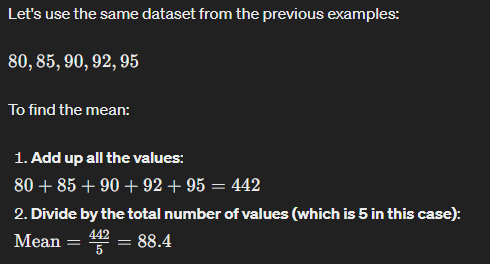

In [3]:
mean_value=fact_table[['quantity','unit_price']].mean()
print("Mean value : ")
mean_value

Mean value : 


quantity       5.9739
unit_price    17.4552
dtype: float64

##Standard Deviation
* Calculate the standard deviation of the unit price of the item table,


Standard deviation is a measure of the amount of variation or dispersion in a set of values. It tells us how spread out the numbers in a data set are around the mean.

Here's an example calculation of standard deviation:

Let's say we have a data set of exam scores: 75, 80, 85, 90, 95.

* Calculate the mean (average) of the data set: Mean = (75 + 80 + 85 + 90 + 95) / 5 = 85.
* Calculate the difference between each data point and the mean: Differences: -10, -5, 0, 5, 10.
* Square each difference: Squares: 100, 25, 0, 25, 100.
* Calculate the mean of the squared differences: Mean of squares = (100 + 25 + 0 + 25 + 100) / 5 = 50.
* Take the square root of the mean of the squared differences: Standard deviation = √50 ≈ 7.07.

So, the standard deviation of the exam scores is approximately 7.07.

In [4]:
std_value=fact_table['unit_price'].std()
std_value

8.535126114931154

##Mode
* Find the mode value/most common value of the customer key in the fact table.

* mode refers to the value or values that occur most frequently in a dataset. Mode is commonly used with categorical data, where data points are grouped into categories rather than being numerical values.

* For example, consider a dataset representing the favorite colors of a group of people:Red, Blue, Green, Blue, Red, Yellow, Blue
In this dataset, "Blue" occurs most frequently, so the mode of this dataset is "Blue".

In [5]:
mode_value=fact_table['coustomer_key'].mode()
mode_value

0    C004608
Name: coustomer_key, dtype: object

##Median Value
* Find the middle value of the data set
* For example, consider the dataset [3, 6, 1, 9, 12, 4, 7]. When these values are arranged in ascending order, it becomes [1, 3, 4, 6, 7, 9, 12]. The median in this case is 6, because it's the middle value.

* If the dataset had been [3, 6, 1, 9, 12, 4], then the median would be (4 + 6) / 2 = 5, because 4 and 6 are the two middle values.

In [6]:
median_value=fact_table['unit_price'].median()
median_value

16.0

##Skewness

In [7]:
skew_value = fact_table[['quantity']].skew()
skew_value

quantity    0.005529
dtype: float64

#Group By

##Group by & Sum over 1 column

In [22]:
payment_key_sum_group =fact_table.groupby(['payment_key']).sum()
payment_key_sum_group['unit_price'].head()

payment_key
P001    4488.25
P002    4783.75
P003    4609.75
P004    4685.25
P005    4476.25
Name: unit_price, dtype: float64

##Group by & Reset Index & Sum over 1 column

In [24]:
payment_key_sum_group =fact_table.groupby(['payment_key']).sum().reset_index()
payment_key_sum_group['unit_price'].head()

0    4488.25
1    4783.75
2    4609.75
3    4685.25
4    4476.25
Name: unit_price, dtype: float64

##Group & Sum & Reset_index over 2 columns

In [10]:
payment_item_key=fact_table.groupby(['payment_key', 'item_key']).sum().reset_index()
selected_columns = ['payment_key','unit_price','total_price']
payment_item_key[selected_columns].head()

,payment_key,unit_price,total_price
0,P001,13.50,67.50
1,P001,6.75,54.00
2,P001,13.50,47.25
3,P001,16.25,65.00
4,P001,16.25,81.25


#Groupby & multiple aggregations

In [11]:
payment_key_max_min =fact_table.groupby(['payment_key']).aggregate(['min','max']).reset_index()
selected_columns = ['payment_key','unit_price','total_price']
payment_key_max_min[selected_columns].head()

payment_key unit_price       total_price       
                     min   max         min    max
0        P001       6.00  48.0        6.00  506.0
1        P002       6.00  55.0        8.00  605.0
2        P003       6.75  48.0        6.75  528.0
3        P004       6.00  55.0        6.75  583.0
4        P005       6.00  55.0        6.75  530.0

##Groupby & multiple aggregations over different columns

In [12]:
payment_coustermer_key =fact_table.groupby(['payment_key', 'coustomer_key']).aggregate({'quantity':'sum','unit_price':['min','max']}).reset_index()
payment_coustermer_key

payment_key coustomer_key quantity unit_price       
                                    sum        min    max
0           P001       C000005      4.0      14.00  14.00
1           P001       C000020     11.0      20.00  20.00
2           P001       C000045      5.0      16.00  16.00
3           P001       C000073      1.0       6.00   6.00
4           P001       C000091      1.0      20.00  20.00
...          ...           ...      ...        ...    ...
9847        P039       C009120      4.0       6.75   6.75
9848        P039       C009127      6.0      15.00  15.00
9849        P039       C009132      4.0      24.00  24.00
9850        P039       C009156     10.0      11.00  11.00
9851        P039       C009167      8.0      11.50  11.50

[9852 rows x 5 columns]

#Merge Dataframe

##Merge Two Tables

In [13]:
fact_table_trans_dim=fact_table.merge(trans_dim)

##Merge Two Tables based on a key

In [14]:
fact_table_store_dim=pd.merge(fact_table,store_dim,on='store_key')

#Correlation

####Correlation between Two Columns

In [15]:
corr_unit_total=fact_table['unit_price'].corr(fact_table['total_price'])
corr_unit_total

0.6281719517649814

####Correlation between All columns

In [16]:
df2=item_dim.corr()

ValueError: could not convert string to float: 'I00001'

#Pracetice

###Practice problem 4.1
---
####Load all of the dimension table from e-commerce-data.xlsx into the padas dataframe

In [25]:
#Loading particular sheet of xlsx data into pandas data frame from the xlsx file located in google drive
fact_table = pd.read_excel(file_path, sheet_name='Fact_table', engine='openpyxl')
#Loading particular sheet of xlsx data into pandas data frame from the xlsx file located in google drive
item_dim = pd.read_excel(file_path, sheet_name='Item_dim', engine='openpyxl')
customer_dim = pd.read_excel(file_path, sheet_name='Coustomer_dim', engine='openpyxl')
time_dim= pd.read_excel(file_path, sheet_name='Time_dim', engine='openpyxl')
store_dim= pd.read_excel(file_path, sheet_name='Store_dim', engine='openpyxl')
trans_dim= pd.read_excel(file_path, sheet_name='Trans_dim', engine='openpyxl')

###Practice problem 4.2
---
####Calculate the mean value of the total price of the fact table

In [26]:
mean_value_total_price=fact_table[['total_price']].mean()
print("Mean value : ")
mean_value_total_price

Mean value : 


total_price    103.973112
dtype: float64

###Practice problem 4.3
---
####Calculate the standard deviation of all columns of the fact table

In [33]:
numeric_columns = fact_table.select_dtypes(include='number')
std_value=numeric_columns.std()
print(std_value)

quantity        3.167880
unit_price      8.535518
total_price    79.235693
dtype: float64


###Practice problem 4.4
-------------------
####Find the most common unit in the fact table

In [35]:
common_unit=fact_table['unit'].mode()
common_unit

0    ct
Name: unit, dtype: object

###Practice problem 4.5
-------------------------
####Find the skewness of the fact table

In [37]:
numeric_columns_fact_table=fact_table.select_dtypes(include='number')
skew=numeric_columns_fact_table.skew()
skew

quantity       0.005041
unit_price     1.901626
total_price    1.820909
dtype: float64

###Practice problem 4.6
----------------------------------------------
####Find the median value of total price of the fact

In [39]:
median_value_total_price=fact_table['total_price'].median()
median_value_total_price

87.5

In [40]:
fact_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   payment_key    10000 non-null  object 
 1   coustomer_key  10000 non-null  object 
 2   time_key       10000 non-null  object 
 3   item_key       10000 non-null  object 
 4   store_key      10000 non-null  object 
 5   quantity       9997 non-null   float64
 6   unit           9953 non-null   object 
 7   unit_price     9999 non-null   float64
 8   total_price    9995 non-null   float64
dtypes: float64(3), object(6)
memory usage: 703.2+ KB


###Practice problem 4.7
--------------------------------------------------
####Compute the sum of quantity, unit price, and total price group by coustomer key in the fact table with index.

In [48]:
df2 =fact_table.groupby(['coustomer_key']).aggregate({'quantity':'sum','unit_price':'sum','total_price':'sum'}).reset_index()
df2

,coustomer_key,quantity,unit_price,total_price
0,C000001,7.0,17.0,119.0
1,C000002,20.0,40.0,400.0
2,C000003,16.0,27.0,222.0
3,C000004,2.0,40.0,80.0
4,C000005,4.0,14.0,56.0
...,...,...,...,...
6073,C009187,2.0,8.0,16.0
6074,C009188,12.0,31.0,198.0
6075,C009189,6.0,14.0,84.0
6076,C009190,10.0,22.0,134.0


###Practice problem 4.8
-----------------------------------------
####Using the fact table find the sum of quantity and mean, min, and max values of the total price group by coustomer key.

In [50]:
df3 = fact_table.groupby(['coustomer_key']).aggregate({'quantity':['sum','mean'],'total_price':['min','max']}).reset_index()
df3

coustomer_key quantity       total_price       
                        sum  mean         min    max
0          C000001      7.0   7.0       119.0  119.0
1          C000002     20.0  10.0       180.0  220.0
2          C000003     16.0   8.0        72.0  150.0
3          C000004      2.0   2.0        80.0   80.0
4          C000005      4.0   4.0        56.0   56.0
...            ...      ...   ...         ...    ...
6073       C009187      2.0   2.0        16.0   16.0
6074       C009188     12.0   6.0        28.0  170.0
6075       C009189      6.0   6.0        84.0   84.0
6076       C009190     10.0   5.0         8.0  126.0
6077       C009191     13.0   6.5        51.0  140.0

[6078 rows x 5 columns]

###Practice problem 4.9
-------------------------------------------------------------------------
####Find the total price and min-max of the unit price from the fact table group by the Upazila.

In [54]:
fact_table_customer_dim=pd.merge(fact_table,customer_dim, on='coustomer_key')

In [57]:
df4 = fact_table_customer_dim.groupby(['upazila']).aggregate({'total_price':'sum','unit_price':['min','max']}).reset_index()
df4

upazila total_price unit_price      
                            sum        min   max
0          Agargaon    39880.75        6.0  53.0
1   Bashundhara R/A    81877.00        6.0  55.0
2        Bishwanath    77040.75        6.0  55.0
3         Dhanmondi    40540.00        6.0  55.0
4          Farmgate    37393.50        6.0  53.0
5          Gournadi    40824.25        6.0  55.0
6        Keranigong    75349.25        6.0  53.0
7          Kharpara    37390.25        6.0  53.0
8             Megna   110871.75        6.0  55.0
9          Mirpur-1   153774.50        6.0  55.0
10         Mogbazar    34096.25        6.0  55.0
11      Mohammadpur    78478.75        6.0  55.0
12            Savar   112035.50        6.0  55.0
13         Shyamoli    41747.75        6.0  55.0
14           Uttara    77911.00        6.0  55.0

###Practice problem 4.10
-------------------------------------------------------------------------------
####Find the correlation between the quantity and the total price of the fact_table

In [59]:
correlation = fact_table['quantity'].corr(fact_table['total_price'])
correlation

0.6920763744039204